## Getting ready

This data set was provided by sex toys shop Sexy Elephant.

Sexy Elephant commissioned an oral-sex-focused questionnaire survey on a representative sample (n=1100) of the Czech's online population in the age range 18-65. The survey was conducted by an international market research agency.

In [83]:
import pandas as pd
import numpy as np
import plotly.express as px
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('oral_sex_eng_translation.csv')

## The Dataset itself

In [85]:
data

,Form ID,Age,Sex,Admin region,Historical region,Resident population,Education,Do you engage in oral sex?,Kind of sex and eye contact
0,1,26,Female,Hradec Kralove,Bohemia,1 001 to 5 000,Elementary,Yes – mostly because I initiated it,Vaginal sex – eye contact is not important
1,2,29,Male,Pardubice,Bohemia,20 001 to 100 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important
2,3,63,Male,Prague,Prague,100 001 and above,Apprenticeship,Yes – because we both equally wanted to,Vaginal sex – eye contact is not important
3,4,32,Male,Prague,Prague,100 001 and above,Secondary,Yes – mostly because I initiated it,Vaginal sex – eye contact is important
4,5,33,Female,Pardubice,Bohemia,1 001 to 5 000,Apprenticeship,Yes – because we both equally wanted to,Anal sex – eye contact is important
...,...,...,...,...,...,...,...,...,...
1095,1096,56,Female,Zlin,Moravia,20 001 to 100 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is not important
1096,1097,35,Female,Central Bohemian,Bohemia,5 001 to 20 000,Secondary,No – although I had a vaginal/anal sex,Vaginal sex – eye contact is not important
1097,1098,28,Male,Central Bohemian,Bohemia,Up to 1 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important
1098,1099,28,Female,Zlin,Moravia,Up to 1 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is important


Average age for oral sex

In [86]:
print(data["Age"].mean())

42.45


In [87]:
print(data["Age"].std())

13.318327353466183


In [88]:
print(data["Age"].median())

43.0


## Data description

In [89]:
data["Age"].describe()

count    1100.000000
mean       42.450000
std        13.318327
min        18.000000
25%        31.000000
50%        43.000000
75%        54.000000
max        65.000000
Name: Age, dtype: float64

In [90]:
categories = [col for col in data.columns if data[col].dtype=='O']
categories

['Sex',
 'Admin region',
 'Historical region',
 'Resident population',
 'Education',
 'Do you engage in oral sex?',
 'Kind of sex and eye contact']

In [91]:
uqique_categories_values={}
for colm in categories:
    uqique_categories_values[colm] = data[colm].unique()

uqique_categories_values

{'Sex': array(['Female', 'Male'], dtype=object),
 'Admin region': array(['Hradec Kralove', 'Pardubice', 'Prague', 'South Moravian',
        'Central Bohemian', 'Usti nad Labem', 'Vysocina',
        'Moravian-Silesian', 'Zlin', 'Plzen', 'South Bohemian', 'Liberec',
        'Karlovy Vary', 'Olomouc'], dtype=object),
 'Historical region': array(['Bohemia', 'Prague', 'Moravia'], dtype=object),
 'Resident population': array(['1 001 to 5 000', '20 001 to 100 000', '100 001 and above',
        '5 001 to 20 000', 'Up to 1 000'], dtype=object),
 'Education': array(['Elementary', 'Apprenticeship', 'Secondary', 'University'],
       dtype=object),
 'Do you engage in oral sex?': array(['Yes – mostly because I initiated it',
        'Yes – because we both equally wanted to',
        'No – and I had no vaginal/anal sex',
        'No – although I had a vaginal/anal sex',
        'Yes – mostly because my partner initiated it',
        'I don’t know/remember'], dtype=object),
 'Kind of sex and eye cont

## Pretty clean, don't you think?

In [92]:
data.isnull().values.any()

False

In [93]:
data.isnull().sum().sum()

0

## Let's add some columns!

In [94]:
data["Difference in age from max"] = max(data["Age"]) - data["Age"]
data

,Form ID,Age,Sex,Admin region,Historical region,Resident population,Education,Do you engage in oral sex?,Kind of sex and eye contact,Difference in age from max
0,1,26,Female,Hradec Kralove,Bohemia,1 001 to 5 000,Elementary,Yes – mostly because I initiated it,Vaginal sex – eye contact is not important,39
1,2,29,Male,Pardubice,Bohemia,20 001 to 100 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important,36
2,3,63,Male,Prague,Prague,100 001 and above,Apprenticeship,Yes – because we both equally wanted to,Vaginal sex – eye contact is not important,2
3,4,32,Male,Prague,Prague,100 001 and above,Secondary,Yes – mostly because I initiated it,Vaginal sex – eye contact is important,33
4,5,33,Female,Pardubice,Bohemia,1 001 to 5 000,Apprenticeship,Yes – because we both equally wanted to,Anal sex – eye contact is important,32
...,...,...,...,...,...,...,...,...,...,...
1095,1096,56,Female,Zlin,Moravia,20 001 to 100 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is not important,9
1096,1097,35,Female,Central Bohemian,Bohemia,5 001 to 20 000,Secondary,No – although I had a vaginal/anal sex,Vaginal sex – eye contact is not important,30
1097,1098,28,Male,Central Bohemian,Bohemia,Up to 1 000,Apprenticeship,Yes – because we both equally wanted to,Oral sex – eye contact is not important,37
1098,1099,28,Female,Zlin,Moravia,Up to 1 000,Apprenticeship,Yes – mostly because my partner initiated it,Vaginal sex – eye contact is important,37


In [95]:
data["Difference in age from max"].describe()

count    1100.000000
mean       22.550000
std        13.318327
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        47.000000
Name: Difference in age from max, dtype: float64

In [96]:
data["Difference in age from max"].median()

22.0

## Plots

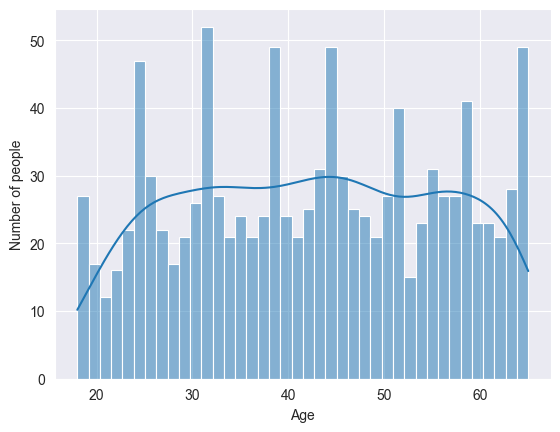

In [97]:
sns.histplot(data['Age'], kde=True, bins=40)
plt.ylabel("Number of people")
plt.show()

Age is not normally distributed.

In [98]:
unique = data["Age"].unique()
df12 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if 18 <= x <= 20])
df23 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if 20 < x <= 30])
df34 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if 30 < x <= 40])
df45 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if 40 < x <= 50])
df56 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if 50 < x <= 60])
df6 = sum([data.loc[data.Age == x, 'Age'].count() for x in unique if x > 60])
colours = ['red', 'blue', 'green', 'yellow','purple', 'orange']

In [99]:
fig = px.pie(data, values = [df12, df23, df34, df45, df56, df6], names = ["18-20", "20-30", "30-40", "40-50", "50-60", "60+"], title = "Age in percentage", color = colours)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

The biggest number of people, who took the survey, were from age 40 to 50 y.o.

In [100]:
def OverviewPlots(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data[2:] if nunique[col] > 1 and nunique[col] < 60]]
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(figsize = (4 * nGraphPerRow, 6 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columndata = data.iloc[:, i]
        valueCounts = columndata.value_counts()
        valueCounts.plot.bar()
        plt.ylabel('Number of people')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

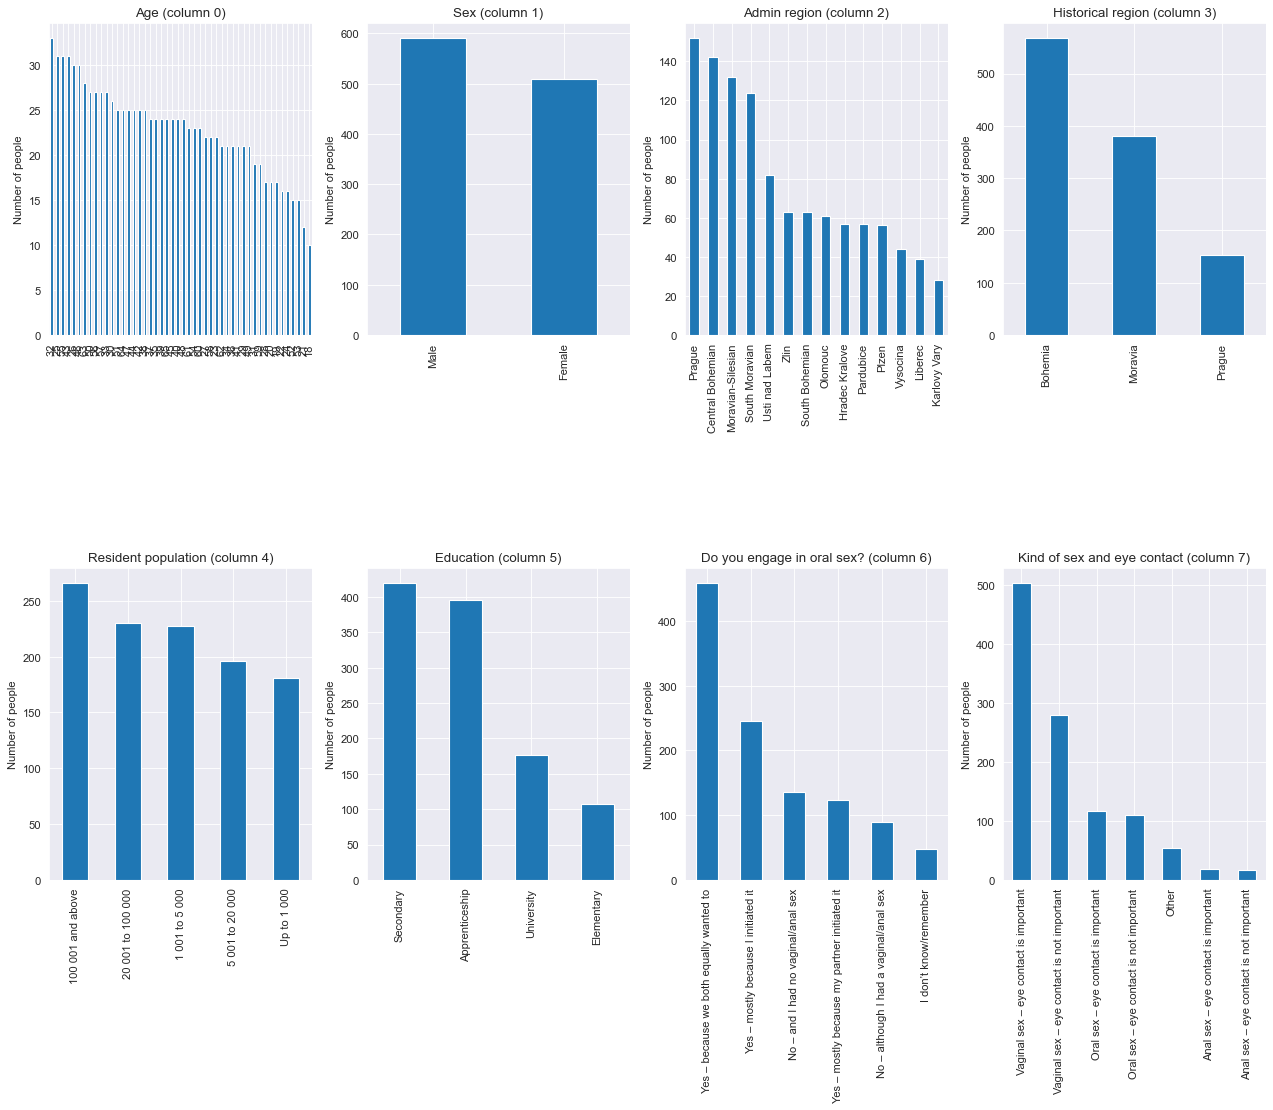

In [101]:
OverviewPlots(data, 8, 4)

General information about given dataset.

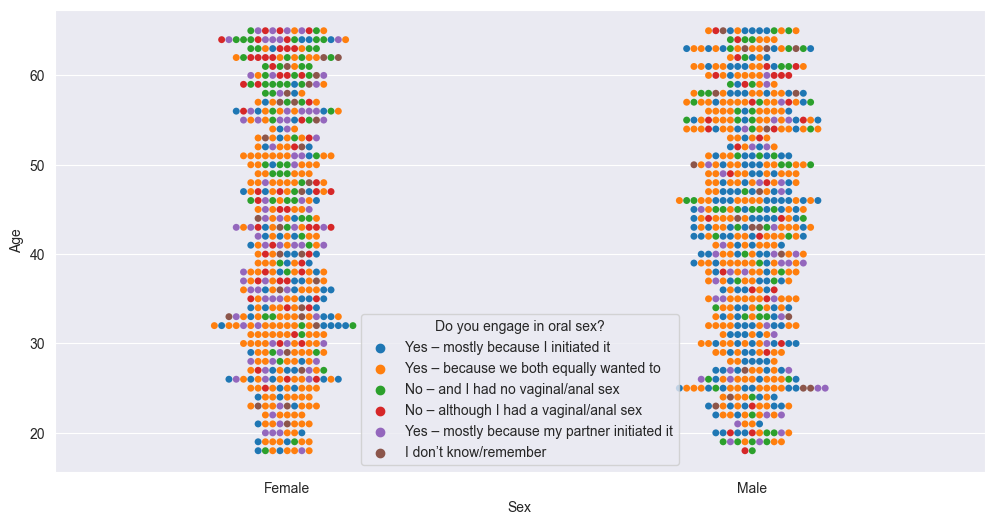

In [102]:
plt.figure(figsize=(12,6))
sns.swarmplot(y=data['Age'],x=data['Sex'],hue=data['Do you engage in oral sex?'])
plt.show()

This graph shows us answers to the survey and with their age and sex. As we see in it, in most cases both sides were engaged in oral sex with mutual agreement. Although, as we can see with men, the other significant part initiated it on their own decision, whereas on the women side it is clear, that mutual agreement is in a leading position and many of them didn't have vaginal sex nor anal sex. Moreover, as the age is getting bigger it becomes more likely that people don't remember being engaged in oral sex or didn't participate in it at all.

# Hypothesis

In general, people do anal sex and for them, it is not important, whether they have eye contact or not (especially for men). Moreover, my assumption is that sex is popular during University life and most people do it in the age form 20-40 years. And women are the most interested part in holding such an event.

In [103]:
fig = px.pie(data, values = data["Sex"].value_counts(), names = data["Sex"].unique(), title = "Sex comparison")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

As we can see from the pie-chart, the most popular sex in this survey is men.

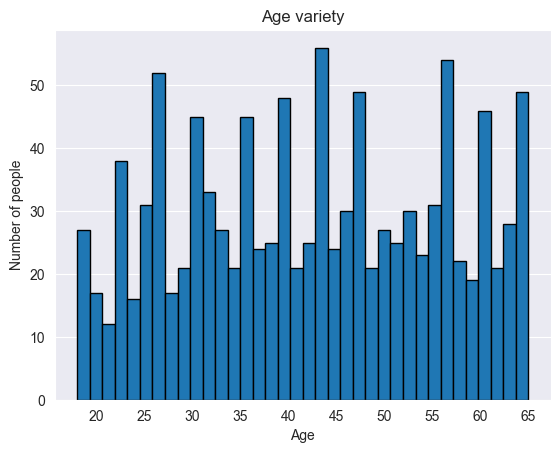

In [104]:
plot1 = plt.figure(1)
x = data['Age']
plt.grid(axis='x')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age variety')
plt.xticks(np.arange(10, 70, 5))

hist_plot = plt.hist(x, bins = 36, ec='black')

The most popular age to have sex is from 40 to 45 y.o.

([0, 1, 2, 3],
 [Text(0, 0, 'Elementary'),
  Text(1, 0, 'Apprenticeship'),
  Text(2, 0, 'Secondary'),
  Text(3, 0, 'University')])

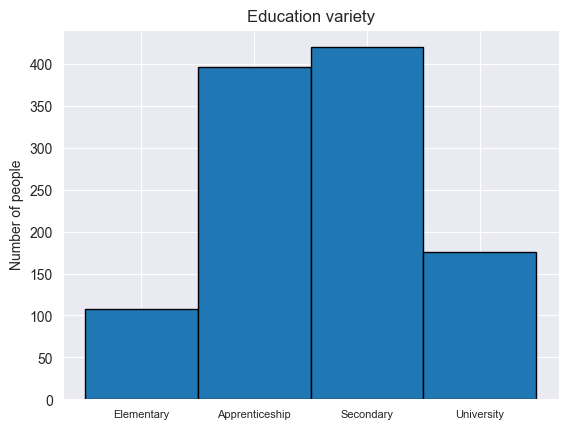

In [105]:
plot1 = plt.figure(4)
x = data['Education']
hist_plot = plt.hist(x, bins=np.arange(5)-0.5, ec='black')
plt.ylabel('Number of people')
plt.title('Education variety')
plt.xticks(size = 8, rotation=0)

The most popular time to have sex is during Secondary education.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Yes – because we both equally wanted to'),
  Text(1, 0, 'Yes – mostly because I initiated it'),
  Text(2, 0, 'No – although I had a vaginal/anal sex'),
  Text(3, 0, 'No – and I had no vaginal/anal sex'),
  Text(4, 0, 'Yes – mostly because my partner initiated it'),
  Text(5, 0, 'I don’t know/remember')])

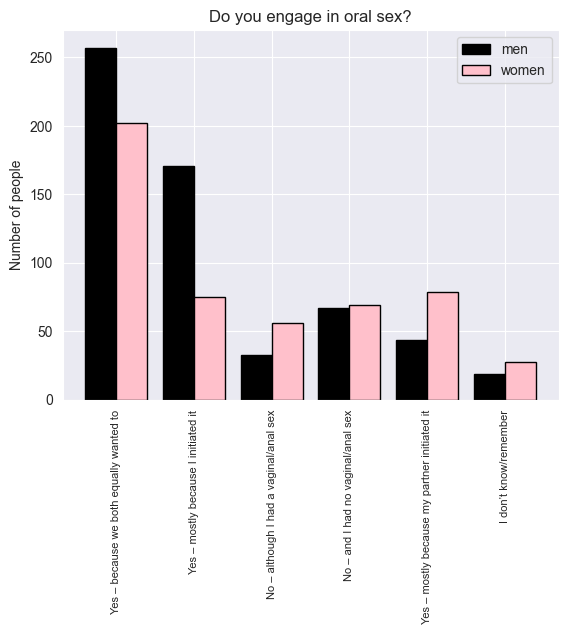

In [106]:
plot1 = plt.figure(5)
df_men = data.loc[data['Sex'] == 'Male']
x = df_men['Do you engage in oral sex?']

df_women = data.loc[data['Sex'] == 'Female']
y = df_women['Do you engage in oral sex?']

plt.hist(x, bins=np.arange(7)-0.7, rwidth=0.4, color='black', label='men', ec='black')
plt.hist(y, bins=np.arange(7)-0.3, rwidth=0.4, color='pink', label='women', ec='black')

plt.legend(loc='upper right')
plt.title('Do you engage in oral sex?')
plt.ylabel('Number of people')
plt.xticks(size = 8, rotation=90)

Most of the people wanted sex muatually, both male and female.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Oral sex – eye contact is not important'),
  Text(1, 0, 'Vaginal sex – eye contact is not important'),
  Text(2, 0, 'Vaginal sex – eye contact is important'),
  Text(3, 0, 'Oral sex – eye contact is important'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Anal sex – eye contact is not important'),
  Text(6, 0, 'Anal sex – eye contact is important')])

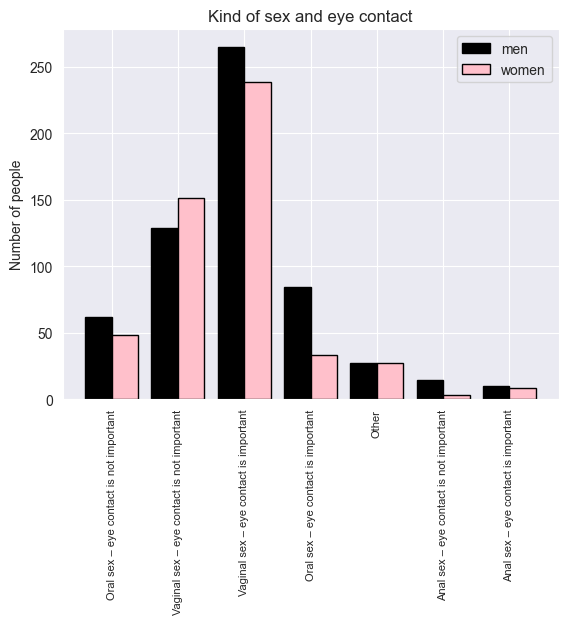

In [107]:
plot1 = plt.figure(6)
data_men = data.loc[data['Sex'] == 'Male']
x = data_men['Kind of sex and eye contact']

data_women = data.loc[data['Sex'] == 'Female']
y = data_women['Kind of sex and eye contact']

plt.hist(x, bins=np.arange(8)-0.7, rwidth=0.4, color='black', label='men', ec='black')
plt.hist(y, bins=np.arange(8)-0.3, rwidth=0.4, color='pink', label='women', ec='black')
plt.legend(loc='upper right')
plt.title('Kind of sex and eye contact')
plt.ylabel('Number of people')
plt.xticks(size = 8, rotation=90)

It is clear that the most popular sex variant is vaginal sex with straight eye contact.

## Conclusion (+ hyphothesis check)

So, as an overview, my hypothesis was incorrect. Basically, when the mutual agreement occur, it is more likely that both genders will agree to have oral sex. Moreover, eye contact plays a great role in sex, and especially in vaginal sex. The most popular age to have sex is vaginal and the most popular age to hold such an event is 40-45 y.o.